In [1]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import logging
from funs import *

log("START",level = ("start","Local_Outlier_Factor"))

Local_Outlier_Factor



<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Impot danych z wcześniejszego parsowania w Anomaly_detect_ML</div>
</div>

In [2]:
df_1_scaled = pd.read_hdf('parsed_data/segmented_CICIDS2017.h5', key='df_1_scaled')
df_scaled = pd.read_hdf('parsed_data/segmented_CICIDS2017.h5', key='df_2_scaled')
df_labels = pd.read_hdf('parsed_data/segmented_CICIDS2017.h5', key='df_2_labels')

<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Treming modelu</div>
</div>

In [7]:
LOF= LocalOutlierFactor(
    n_neighbors=5,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=True,
    n_jobs=None
)
LOF.fit(df_1_scaled)

,n_neighbors,5
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,'auto'
,novelty,True
,n_jobs,None


<div style="margin-left: 38px; font-size: 30px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; margin-top: 20px; line-height: 1.6;">
    <div>Treming modelu</div>
</div>

/root/Anomaly_Detection/venv_AD/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/root/Anomaly_Detection/venv_AD/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


no_name
Detection distribution anomaly/normal: 26.5743% / 73.4257%
!!! Wyniki pokazuje dopasowanie contamination (wyciagania wnioskow z gotowego produktu pracy modelu) NIE DCHYLENIA NORMALNY/ANOMALYJNY ruch sieciowy !!!
Anomaly detected: 90944
Normal traffic: 251281


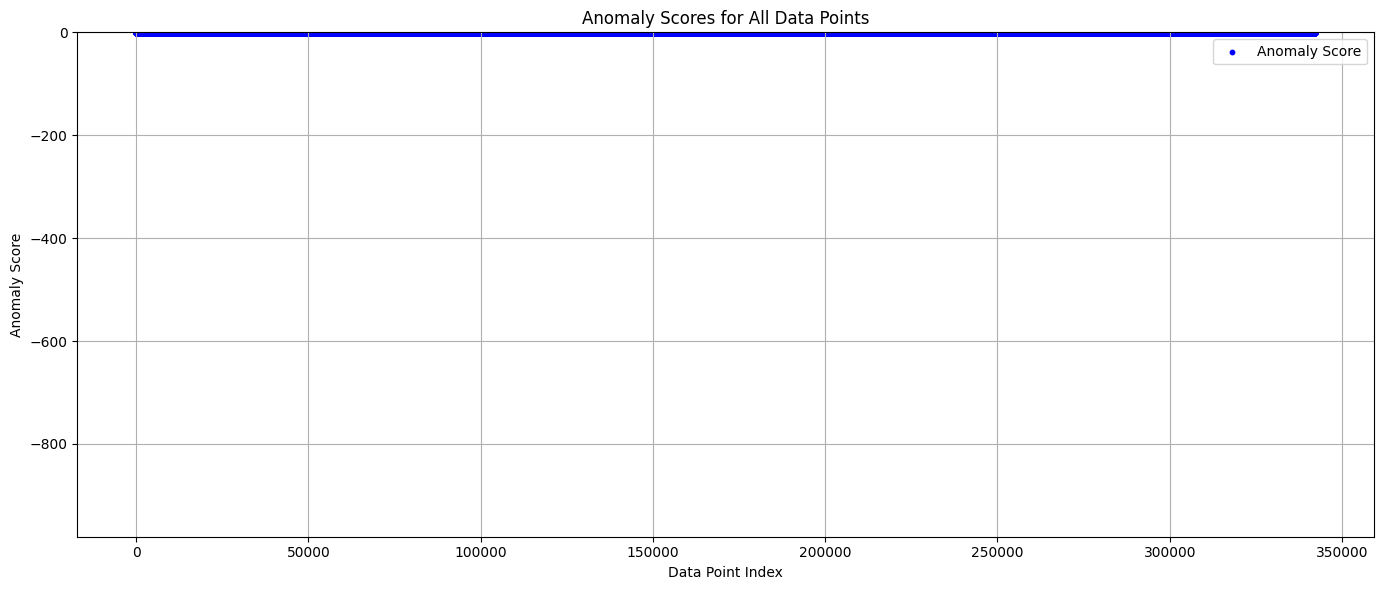

no_name
Number of flows in df_2_test: 342225
Correct data: 
Real number of anomalies in df_2_test: 9084
Procentage of anomlys in dataset: 2.6544%
Predicted data: 
Number of DETECTED anomalies in df_2_test: 90944
Procentage of anomlys in dataset: 26.5743%

Number of correct predictions(TP): 8965
Number of wrong predyctions(FP): 81979
Accuracy of predictions: 76.0105%
Sensitivity of predictions: 98.6900%
Precision of predictions: 9.8577%
F - mesure - harmonic-mean of precision and sensitivity: 17.9250%


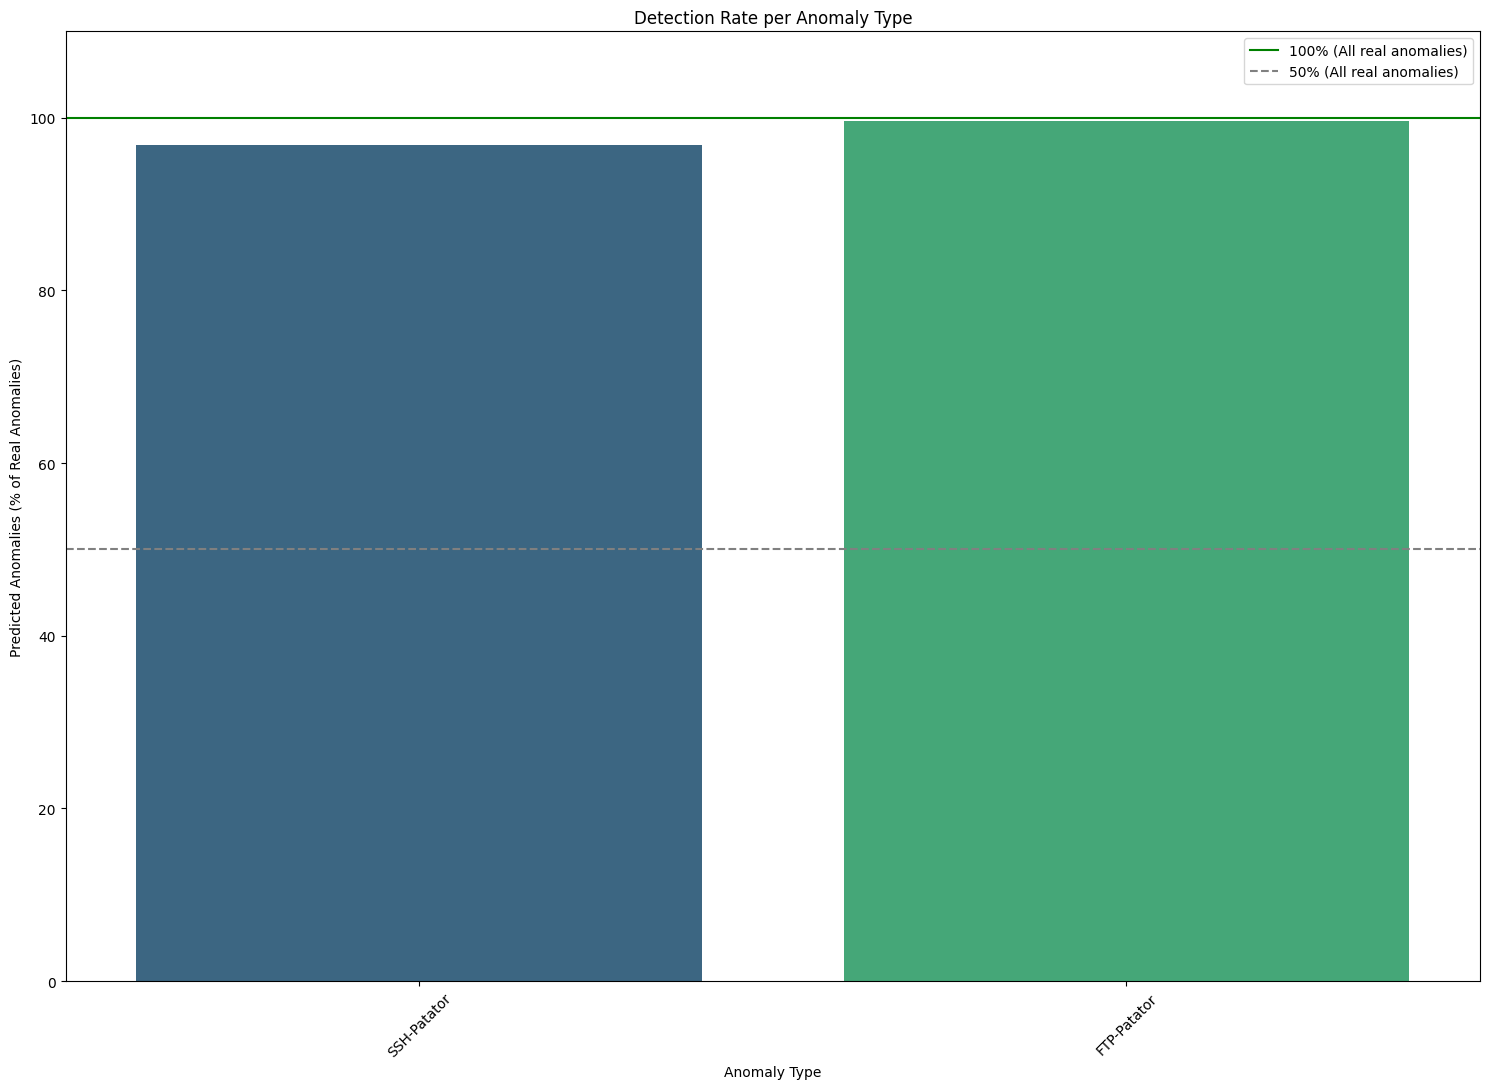

In [4]:
df_scaled_result_check = test_LOF_model(LOF,df_scaled,df_labels, name="df_2_test")

In [22]:
df_scaled_result_check_sorted = df_scaled_result_check.sort_values(by='anomaly_score', ascending=True)

In [23]:
print(df_scaled_result_check_sorted[['Label', 'anomaly_score','prediction']].head(10))


         Label  anomaly_score  prediction
130137  BENIGN      -0.641237           1
130828  BENIGN      -0.641237           1
310363  BENIGN      -0.636152           1
310402  BENIGN      -0.636152           1
310390  BENIGN      -0.636152           1
310317  BENIGN      -0.636152           1
310366  BENIGN      -0.636152           1
310332  BENIGN      -0.636152           1
310322  BENIGN      -0.636152           1
26279   BENIGN      -0.634760           1
